**International Revenue Share Fraud Detection using Supervised Machine Learning**

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer

## Reading Data

In [ ]:
data= pd.read_csv('/content/Data.csv')

## Data exploration

In [ ]:
data.head()

,Time,Destination,Calling Number,Called Number,Minutes,Case
0,3/28/2023 7:58,Falkland Island Roc-2,18083337253,50004606.0,0:00,1
1,7/26/2022 10:15,Falkland Island Roc-2,85593866722,50004620.0,0:00,1
2,7/26/2022 10:15,Falkland Island Roc-2,85593866786,50004625.0,0:00,1
3,3/28/2023 7:58,Falkland Island Roc-2,18083337207,50004635.0,0:00,1
4,7/19/2022 10:15,Falkland Island Roc-2,5.83E+11,50004637.0,0:00,1


## Description of the Data

In [ ]:
data.describe()

,Called Number,Case
count,7.565100e+04,75651.000000
mean,3.101493e+12,0.404938
std,5.602381e+13,0.490883
min,5.000461e+07,0.000000
25%,5.917244e+10,0.000000
50%,9.180000e+11,0.000000
75%,8.800000e+12,1.000000
max,8.800000e+15,1.000000


## Data information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75651 entries, 0 to 75650
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time            75651 non-null  object 
 1   Destination     75651 non-null  object 
 2   Calling Number  75617 non-null  object 
 3   Called Number   75651 non-null  float64
 4   Minutes         75651 non-null  object 
 5   Case            75651 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.5+ MB


## Checking if there's null or unavailable values

In [ ]:
data.isnull().sum()

Time               0
Destination        0
Calling Number    34
Called Number      0
Minutes            0
Case               0
dtype: int64

In [ ]:
data.isna().sum()

Time               0
Destination        0
Calling Number    34
Called Number      0
Minutes            0
Case               0
dtype: int64

## Remove Null and Unavailable Values

In [ ]:
data= data.dropna()

## Checking Duplicates

In [ ]:
dup= data.duplicated().sum()
print(dup)

893


## Duplicates found, Dropping them:

In [ ]:
data= data.drop_duplicates()

## Counting Fraud and Non-fraud cases

In [ ]:
case_count= data["Case"].value_counts()
print(case_count)

0    45008
1    29716
Name: Case, dtype: int64


## Dividing date into year, month, hour, minute and seconds

In [ ]:
data['Time'] = pd.to_datetime(data['Time'])
data['day'] = data['Time'].dt.day
data['month'] = data['Time'].dt.month
data['year'] = data['Time'].dt.year
data['hour'] = data['Time'].dt.hour
data['minute'] = data['Time'].dt.minute
data['second'] = data['Time'].dt.second
data= data.drop('Time', axis=1)

In [ ]:
data.head()

,Destination,Calling Number,Called Number,Minutes,Case,day,month,year,hour,minute,second
0,Falkland Island Roc-2,18083337253,50004606.0,0:00,1,28,3,2023,7,58,0
1,Falkland Island Roc-2,85593866722,50004620.0,0:00,1,26,7,2022,10,15,0
2,Falkland Island Roc-2,85593866786,50004625.0,0:00,1,26,7,2022,10,15,0
3,Falkland Island Roc-2,18083337207,50004635.0,0:00,1,28,3,2023,7,58,0
4,Falkland Island Roc-2,5.83E+11,50004637.0,0:00,1,19,7,2022,10,15,0


## Converting objects into float

In [ ]:
le= LabelEncoder()
data['Calling Number']= le.fit_transform(data['Calling Number'])
data["Destination"] = le.fit_transform(data["Destination"])
data["Minutes"] = le.fit_transform(data["Minutes"])
data.head()

,Destination,Calling Number,Called Number,Minutes,Case,day,month,year,hour,minute,second
0,2146,2885,50004606.0,0,1,28,3,2023,7,58,0
1,2146,13234,50004620.0,0,1,26,7,2022,10,15,0
2,2146,13235,50004625.0,0,1,26,7,2022,10,15,0
3,2146,2884,50004635.0,0,1,28,3,2023,7,58,0
4,2146,9048,50004637.0,0,1,19,7,2022,10,15,0


## Balance Data

In [ ]:
rd= RandomUnderSampler()
y= data["Case"]
X= data.drop("Case", axis=1)
X_sampled, y_sampled= rd.fit_resample(X,y)
case_count= y_sampled.value_counts()
print(case_count)

0    29716
1    29716
Name: Case, dtype: int64


## Splitting Data into training and testing data

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_sampled, y_sampled, test_size= 0.3, random_state=42)

In [ ]:
X_train.head()

,Destination,Calling Number,Called Number,Minutes,day,month,year,hour,minute,second
46822,1986,1133,5.036046e+10,0,15,3,2023,0,44,0
47730,4538,1665,5.076310e+10,31,7,7,2022,1,17,0
53900,3529,6575,2.190000e+11,2,27,6,2022,16,33,0
13160,2917,13387,9.200000e+11,14008,17,6,2023,6,50,0
3852,2918,13387,9.170000e+11,13338,17,6,2023,5,45,0


## Random Forest Classifier

In [ ]:
rfc= RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc= rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_rfc))

0.9999439147504207


In [ ]:
print('Accuracy of Random Forest on training set: {:.2f}'.format(nb.score(X_train, y_train)))
print('Accuracy of Random Forest on test set: {:.2f}'.format(nb.score(X_test, y_test)))

### confusion matrix

In [ ]:
cm_rf= confusion_matrix(y_test, y_pred_rfc)
print(cm_rf)

[[8867    0]
 [   1 8962]]


### cm plot

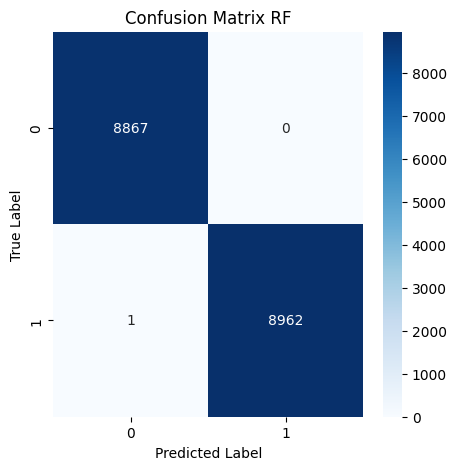

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_rf, annot=True, cmap= 'Blues', fmt= 'd')
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### classification report

In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8867
           1       1.00      1.00      1.00      8963

    accuracy                           1.00     17830
   macro avg       1.00      1.00      1.00     17830
weighted avg       1.00      1.00      1.00     17830



### feature importance

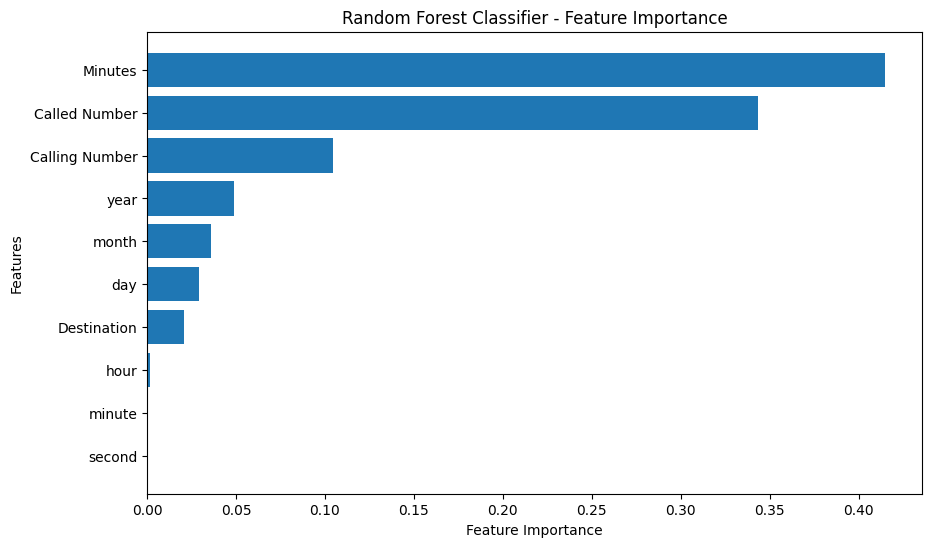

In [ ]:
importances_rfc = rfc.feature_importances_
sorted_indices_rfc = np.argsort(importances_rfc)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances_rfc)), importances_rfc[sorted_indices_rfc])
plt.yticks(range(len(importances_rfc)), X.columns[sorted_indices_rfc])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Classifier - Feature Importance")
plt.show()

## Scaling the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.9918676388109927


In [ ]:
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(nb.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(nb.score(X_test, y_test)))

### Classification report

In [ ]:
cr_lr= classification_report(y_test,y_pred_lr)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8867
           1       1.00      0.99      0.99      8963

    accuracy                           0.99     17830
   macro avg       0.99      0.99      0.99     17830
weighted avg       0.99      0.99      0.99     17830



### confusion matrix

In [ ]:
cm_lr= confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[8850   17]
 [ 128 8835]]


### cm plot

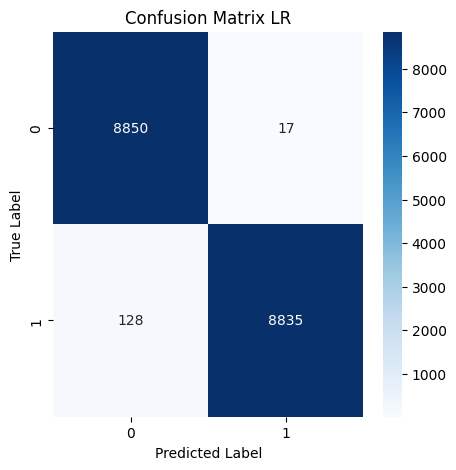

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_lr, annot=True, cmap= 'Blues', fmt= 'd')
plt.title('Confusion Matrix LR')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Support Vector Classifier

In [ ]:
svc= SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(accuracy_score(y_test, y_pred_svc))

0.9644980370162647


In [ ]:
print('Accuracy of Support Vector Classifier on training set: {:.2f}'.format(nb.score(X_train, y_train)))
print('Accuracy of Support Vector Classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))

In [ ]:
cr_svc= classification_report(y_test,y_pred_svc)
print(cr_svc)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      8867
           1       1.00      0.93      0.96      8963

    accuracy                           0.96     17830
   macro avg       0.97      0.96      0.96     17830
weighted avg       0.97      0.96      0.96     17830



### confusion matrix

In [ ]:
cm_svc= confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

[[8867    0]
 [ 633 8330]]


### plot svc

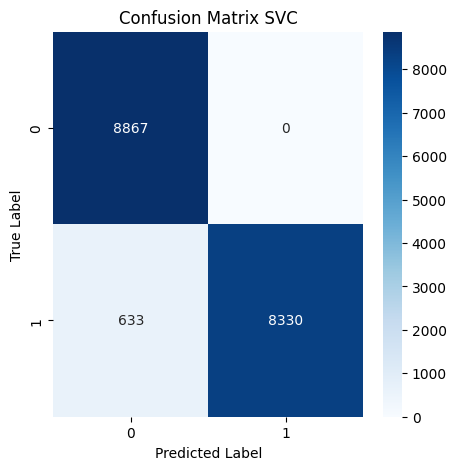

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_svc, annot=True, cmap= 'Blues', fmt= 'd')
plt.title('Confusion Matrix SVC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Gradient Boosting Classifier

In [ ]:
gbc= GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc= gbc.predict(X_test)
print(accuracy_score(y_test, y_pred_gbc))

0.9999439147504207


In [ ]:
print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'.format(nb.score(X_train, y_train)))
print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))

### classification report

In [ ]:
cr_gbc = classification_report(y_test,y_pred_gbc)
print(cr_gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8867
           1       1.00      1.00      1.00      8963

    accuracy                           1.00     17830
   macro avg       1.00      1.00      1.00     17830
weighted avg       1.00      1.00      1.00     17830



### confusion matrix

In [ ]:
cm_gbc= confusion_matrix(y_test, y_pred_gbc)
print(cm_gbc)

[[8867    0]
 [   1 8962]]


### plot cm

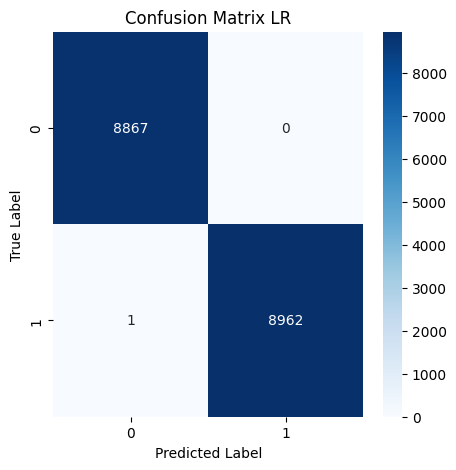

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_gbc, annot=True, cmap= 'Blues', fmt= 'd')
plt.title('Confusion Matrix LR')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Naive Bayes

In [ ]:
nb= GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb= nb.predict(X_test)
print(accuracy_score(y_test,y_pred_nb))

0.7185642176107684


In [ ]:
print('Accuracy of NB  classifier on training set: {:.2f}'.format(nb.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 0.72
Accuracy of NB classifier on test set: 0.72


### classification report

In [ ]:
cr_nb= classification_report(y_test,y_pred_nb)
print(cr_nb)

              precision    recall  f1-score   support

           0       0.99      0.44      0.61      8867
           1       0.64      0.99      0.78      8963

    accuracy                           0.72     17830
   macro avg       0.82      0.72      0.69     17830
weighted avg       0.81      0.72      0.69     17830



### confusion matrix

In [ ]:
cm_nb= confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

[[3894 4973]
 [  45 8918]]


### cm plot

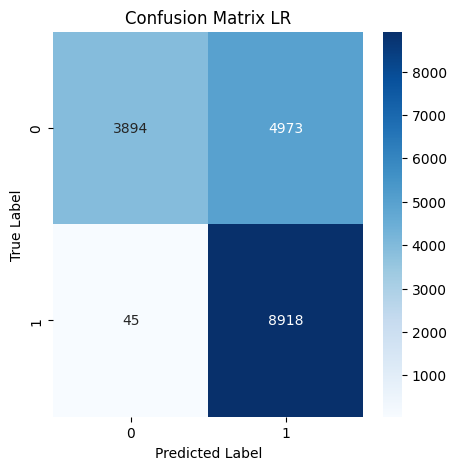

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_nb, annot=True, cmap= 'Blues', fmt= 'd')
plt.title('Confusion Matrix LR')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()